# NUMERICAL APPROXIMATIONS OF $\pi$
## Ian Mitchell, <Ian.Mitchell_001@gmx.com>

**Abstract:** Python has allowed for $\pi$ to be approximated in many easier ways than before. Using an algorithm where an $n$ number of points are placed and the areas of a square and a circle are compared, $\pi$ can be approximated to varying degrees of accuracy. However, the algorithm is a very brute-force method, and can heavily use system resources. In general, it would be easier to symbollicaly or numerically solve a Gaussian integral.

---

## 1. Introduction and Trial

$\pi$ can be numerically approximated using many different methods. However, in this case, we are using a recursive Monte-carlo-like method in Python to essentially average all the areas of the circle. To compare, the Gaussian integral $f(x) = \big(\int_{-\infty}^\infty e^{-x^2}\,dx\big)^2 = \pi$ is used. It can be noted that $e$ is an irrational number itself. However, $e$ has a few clear definitions such as $e = \sum_{k = 0}^{\infty} \frac{1}{k!}$.

It can be noted that the accuracy in which the algorithm measures $\pi$ at increases signifigantly increases with each decimal place. You can see based on the table of trials below. A total of 10 trials were done for each of the values of $n$.

|$n = 10$|$n = 100$|$n = 1000$|$n = 10000$|$n = 100000$|
|:-:|:-:|:-:|:---:|:-----:|
|2.8|3.12|3.18|3.1104|3.147|
|3.2|3.16|3.124|3.146|3.14876|
|3.6|3.24|3.168|3.1332|3.15028|
|3.6|2.8|3.164|3.1544|3.1456|
|3.2|3.12|3.192|3.1496|3.1436|
|1.6|3.08|3.056|3.0976|3.135|
|2.4|3.08|3.132|3.1508|3.14416|
|3.2|3.0|3.08|3.1352|3.14248|
|2.8|3.44|3.048|3.1476|3.13816|
|2.4|3.16|3.14|3.1372|3.14184|
*Table 1: Values of $\pi$ put through the approximater.* 

![pi](pi_pictures/approx.png)
*Fig 1: $\pi$ approximated to $n = 100000$ places.*

![plots_of_pi](pi_pictures/index.png)
*Fig 2: Values of the approximation for $\pi$.*

|$n = 10$|$n = 100$|$n = 1000$|$n = 10000$|$n = 100000$|
|:-:|:-:|:-:|:---:|:-----:|
|0.58788|0.15492|0.04874|0.60126|0.00442|
*Table 2: Standard deviation for each value of $n$.*

## 2. Conclusions

As can be seen from the graph, the graph allows for the circle to go outside of what a circle is. This can mess up the values of $\pi$ since the area is different than that of a *true* cirle's area. However, the actual size of the 'circle' is rather similar to a true *circle*. Yet, it is accurate provided enough points are given. 

The main fault of this can simply be tossed away if one were to use the Gaussian integral

$$f(x) = \bigg(\int_{-\infty}^\infty e^{-x^2}\,dx\bigg)^2 = \pi\,.$$

The use of this integral would serve to be much simpler on calculations and on computer resources. However, problems arise if one does not have a library or program for any sort of symbolic computation (i.e. SymPy, Maxima, or Mathematica™). Yet, the resources used by this algorithm is far more taxing on system resources--negating this solution for lower-performing computers. 

# CODE

---

According to sympy, π is equal to 3.14159265358979. However, the circle approximated it as 3.2.


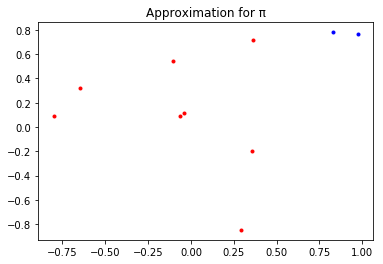

In [1]:
### PI APPROXIMATER ### 
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from numpy import random
from sympy import *

# Sympy approximation

X = symbols('X')

f = exp(-(X**2))

Pi_1 = N((integrate(f, (X, -oo, oo)))**2)

# ----

# Numpy approximation
## Credit to Andrew Dotson with his video "How to Estimate Pi Numerically in Python". <https://www.youtube.com/watch?v=JjfrNc-G-zA>

n = input("Input the number of points. n = ") # Number of points
# print('Input your amount of points. n = ')

circlex = []
circley = []

squarex = []
squarey = []

i = 1

# Approximation for pi
while i<=int(n):
    x = random.uniform(-1, 1)
    y = random.uniform(-1, 1)
    if (x**2 + y**2 <= 1):
        circlex.append(x)
        circley.append(y)
    else: 
        squarex.append(x)
        squarey.append(y)
    i+=1

    
Pi_2 = 4*len(circlex)/float(n)

plt.plot(circlex,circley,'r.')
plt.plot(squarex,squarey,'b.')
plt.grid
plt.title('Approximation for π')
# Plot the approximation

# ----

print("According to sympy, π is equal to {0}. However, the circle approximated it as {1}.".format(Pi_1, Pi_2))

In [32]:
### STANDARD DEVIATION OF THE POINTS FROM THE APPROXIMATER ### 

import matplotlib.pyplot as plt
import numpy as np
from numpy import random
from sympy import *

A = [2.8, 3.2, 3.6, 3.6, 3.2, 1.6, 2.4, 3.2, 2.8, 2.4]
B = [3.12, 3.16, 3.24, 2.8, 3.12, 3.08, 3.08, 3.0, 3.44, 3.16]
C = [3.18, 3.124, 3.168, 3.164, 3.192, 3.056, 3.132, 3.08, 3.048, 3.14]
D = [3.1104, 3.146, 1.1332, 3.1544, 3.1496, 3.0976, 3.1508, 3.1352, 3.1476, 3.1372]
E = [3.147, 3.14876, 3.15028, 3.1456, 3.1436, 3.135, 3.14416, 3.14248, 3.13816, 3.14184]

dev_A = np.round(np.std(A),5)
dev_B = np.round(np.std(B),5)
dev_C = np.round(np.std(C),5)
dev_D = np.round(np.std(D),5)
dev_E = np.round(np.std(E),5)

print("|{0}|{1}|{2}|{3}|{4}|".format(dev_A, dev_B, dev_C, dev_D, dev_E))

|0.58788|0.15492|0.04874|0.60126|0.00442|


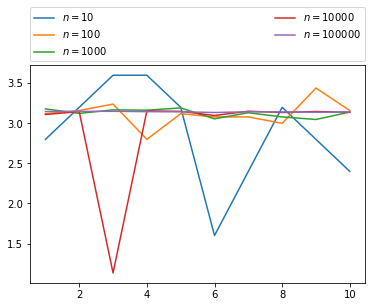

In [23]:
### PLOT OF THE POINTS FOR THE APPROXIMATER ###
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from numpy import random
from sympy import *

A = [2.8, 3.2, 3.6, 3.6, 3.2, 1.6, 2.4, 3.2, 2.8, 2.4]
B = [3.12, 3.16, 3.24, 2.8, 3.12, 3.08, 3.08, 3.0, 3.44, 3.16]
C = [3.18, 3.124, 3.168, 3.164, 3.192, 3.056, 3.132, 3.08, 3.048, 3.14]
D = [3.1104, 3.146, 1.1332, 3.1544, 3.1496, 3.0976, 3.1508, 3.1352, 3.1476, 3.1372]
E = [3.147, 3.14876, 3.15028, 3.1456, 3.1436, 3.135, 3.14416, 3.14248, 3.13816, 3.14184]
Number = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
#plt.subplot(2,1,1)
plt.plot(Number, A, label="$n = 10$")

#plt.subplot(1,2,1)
plt.plot(Number, B, label="$n = 100$")

#plt.subplot(1,1,1)
plt.plot(Number, C, label="$n = 1000$")

#plt.subplot(1,1,2)
plt.plot(Number, D, label="$n = 10000$")

#plt.subplot(2,2,2)
plt.plot(Number, E, label="$n = 100000$")
#plt.plot[B,'b.']

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)

plt.savefig('pi_pictures/values.png')
# Used index.jpg instead since it actually features **THE WHOLE PLOT.**

plt.show()